# Testing association rules using Apyori

**1. What are association rules?**

Association rules are a type of rule-based technique used in data mining and machine learning. They are used to identify interesting relationships or patterns in large datasets. Specifically, association rules find relationships between items in a transactional database or market basket data. These rules highlight the presence of specific combinations of items that frequently occur together in the data.

**Example:**
Let's consider a grocery store transaction database. An association rule might be: {Bread, Milk} → {Butter}. This rule suggests that customers who buy both Bread and Milk are likely to buy Butter as well.

**2. What are they used for?**

Association rules are primarily used for market basket analysis and recommendation systems. They help businesses understand customer behavior, discover item associations, and optimize product placement and promotions. By identifying co-occurrence patterns, businesses can make data-driven decisions to improve customer satisfaction, increase sales, and enhance marketing strategies.

**3. How can they be used, and what do you need?**

To use association rules, you need a transactional dataset where each transaction consists of items purchased together. This dataset is typically in the form of a binary matrix, where each row represents a transaction, and each column corresponds to an item, indicating whether the item was present in the transaction (1) or not (0). It can also be a dataset with a list of items bought together, as in this example.

To apply association rule mining, you can use algorithms like Apriori or FP-Growth. These algorithms take the transactional dataset as input and generate a set of association rules based on certain metrics like support, confidence, and lift.

**Example:**
Suppose you have a dataset containing customer purchase information, where each row represents a transaction, and the columns represent different products. Each cell contains 1 if the product was purchased in that transaction and 0 otherwise.

```
Transaction ID | Bread | Milk | Butter | Eggs | Cheese
1              | 1     | 1    | 0      | 1    | 0
2              | 1     | 0    | 1      | 1    | 0
3              | 0     | 1    | 1      | 0    | 1
... and so on
```

**4. How to select the best association rule once you have the results?**

After applying association rule mining algorithms, you will have a list of association rules along with their corresponding metrics like support, confidence, and lift. The selection of the best association rule depends on your specific objectives and requirements.

Here are some criteria you can use to select the best association rules:

- **Lift:** Choose rules with high lift values. Lift measures how much more likely items are bought together than if they were purchased independently. Higher lift values indicate stronger associations between items.

- **Confidence:** Consider rules with high confidence values. Confidence measures the likelihood that the "consequent" (right-hand side) of the rule is purchased given that the "antecedent" (left-hand side) is purchased. High confidence indicates a strong prediction power of the rule.

- **Support:** Look for rules with significant support values. Support measures the frequency of occurrence of both the antecedent and consequent together. Higher support values indicate that the rule applies to a considerable number of transactions.

- **Practicality:** Select rules that make sense from a business perspective and align with your goals. Sometimes, high-confidence rules may be too obvious to be actionable or may not provide valuable insights.

By considering these factors, you can choose the association rules that are most meaningful and relevant to your specific application.

**Example:**
Let's say you have generated several association rules from a market basket analysis. Among those rules, you might select the ones with a lift greater than 1.5, a confidence higher than 0.7, and a support greater than 0.05. These rules would indicate strong associations between items with a high likelihood of co-occurrence in customer transactions and are significant enough to be actionable for marketing strategies.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from apyori import apriori
import seaborn as sns

df = pd.read_csv('data/Basket.csv', sep='\t', header = None, names=["data"]) 
combos = df['data'].tolist()
listL = [[k.strip() for k in l.split(',')] for l in combos]
# print 5 combos
listL[:5]

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney']]


# Apply apriori

In [37]:
# Support is the evidence of how frequent an item appears in the data given, 
#               number of transactions containing set of times / total number of transactions
#               products that are bought at least 3 times a day --> 21 / 7501 = 0.0027
# Confidence is defined by how many times the if-then statements are found true. 
#               Should not be too high, as then this wil lead to obvious rules
# Lift can be used to compare the expected Confidence and the actual Confidence. Lift will show how many times the if-then statement is expected to be found to be true
#               -If the rule had a lift of 1, it would imply that the probability of occurrence of the antecedent and that of the consequent are independent of each other. When two events are independent of each other, no rule can be drawn involving those two events.
#               -If the lift is > 1, that lets us know the degree to which those two occurrences are dependent on one another, and makes those rules potentially useful for predicting the consequent in future data sets.
#               -If the lift is < 1, that lets us know the items are substitute to each other. This means that presence of one item has negative effect on presence of other item and vice versa.

rules = apriori(listL, 
                min_support = 0.003, 
                min_confidence = 0.2, 
                min_lift = 3, 
                min_length = 2)

results = list(rules)

In [44]:
results = pd.DataFrame(results)
results['confidence'] = results['ordered_statistics'].apply(lambda x: x[0].confidence)
results['lift'] = results['ordered_statistics'].apply(lambda x: x[0].lift)
results['items_base'] = results['ordered_statistics'].apply(lambda x: x[0].items_base)
results['items_added'] = results['ordered_statistics'].apply(lambda x: x[0].items_add)

# Convert columns to the correct data types
results['confidence'] = results['confidence'].astype(float)
results['lift'] = results['lift'].astype(float)
results['support'] = results['support'].astype(float)

# sort results by lift
results = results.sort_values(by=['lift', 'confidence', 'support'], ascending=False)
results.head(10)

,items,support,ordered_statistics,confidence,lift,items_base,items_added
70,"(soup, milk, mineral water, frozen vegetables)",0.003066,"[((soup, frozen vegetables), (milk, mineral wa...",0.383333,7.987176,"(soup, frozen vegetables)","(milk, mineral water)"
69,"(olive oil, milk, mineral water, frozen vegeta...",0.003333,"[((olive oil, frozen vegetables), (milk, miner...",0.294118,6.128268,"(olive oil, frozen vegetables)","(milk, mineral water)"
52,"(whole wheat pasta, mineral water, olive oil)",0.003866,"[((whole wheat pasta, mineral water), (olive o...",0.402778,6.115863,"(whole wheat pasta, mineral water)",(olive oil)
44,"(ground beef, tomato sauce, spaghetti)",0.003066,"[((tomato sauce), (ground beef, spaghetti), 0....",0.216981,5.535971,(tomato sauce),"(ground beef, spaghetti)"
3,"(honey, fromage blanc)",0.003333,"[((fromage blanc), (honey), 0.2450980392156863...",0.245098,5.164271,(fromage blanc),(honey)
0,"(chicken, light cream)",0.004533,"[((light cream), (chicken), 0.2905982905982905...",0.290598,4.843951,(light cream),(chicken)
2,"(pasta, escalope)",0.005866,"[((pasta), (escalope), 0.3728813559322034, 4.7...",0.372881,4.700812,(pasta),(escalope)
24,"(ground beef, herb & pepper, french fries)",0.003200,"[((ground beef, french fries), (herb & pepper)...",0.230769,4.665768,"(ground beef, french fries)",(herb & pepper)
61,"(mineral water, chocolate, shrimp, frozen vege...",0.003200,"[((mineral water, chocolate, frozen vegetables...",0.328767,4.600900,"(mineral water, chocolate, frozen vegetables)",(shrimp)
66,"(ground beef, milk, mineral water, frozen vege...",0.003733,"[((ground beef, frozen vegetables), (milk, min...",0.220472,4.593788,"(ground beef, frozen vegetables)","(milk, mineral water)"


# Display results

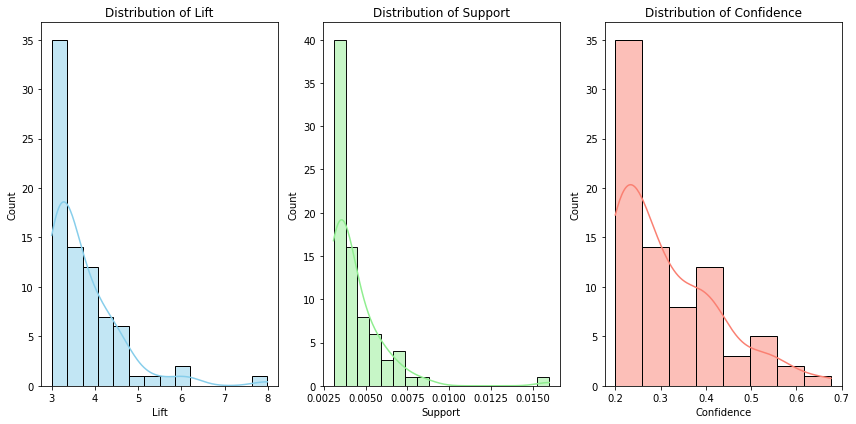

In [43]:
# Set up the figure and axes
plt.figure(figsize=(12, 6))
plt.subplots_adjust(wspace=0.3)

# Plot the distribution of lift
plt.subplot(1, 3, 1)
sns.histplot(results['lift'], kde=True, color='skyblue')
plt.xlabel('Lift')
plt.title('Distribution of Lift')

# Plot the distribution of support
plt.subplot(1, 3, 2)
sns.histplot(results['support'], kde=True, color='lightgreen')
plt.xlabel('Support')
plt.title('Distribution of Support')

# Plot the distribution of confidence
plt.subplot(1, 3, 3)
sns.histplot(results['confidence'], kde=True, color='salmon')
plt.xlabel('Confidence')
plt.title('Distribution of Confidence')

# Display the plot
plt.tight_layout()
plt.show()
